In [2]:
cd ~/Desktop/floating_solar/SAM

/Users/rspencer/Desktop/floating_Solar/SAM


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
rawdata = pd.read_csv("SAM_Results_v2.csv").drop_duplicates(subset="dam_name")
data = rawdata[['state', 'nid_area', 'prim_owner', 'prim_purpose', 'pv_annual_kWh', 'evap_acrft']]
data = data[data.prim_purpose!='Tailings'][['prim_owner', 'prim_purpose', 'pv_annual_kWh']]
data.columns = ['Owner', 'Purpose', 'Generation']

In [5]:
data.Owner.unique()

array(['Private', 'State', 'Local Government', 'Public Utility', 'Federal'], dtype=object)

In [6]:
data.Purpose.unique()

array(['Irrigation', 'Control; Stabilization; Protection', 'Hydroelectric',
       'Water Supply'], dtype=object)

In [7]:
data.shape

(24419, 3)

In [8]:
gb = (data.groupby(['Owner','Purpose']).sum().unstack()['Generation'])/(1000 * 1000 * 1000) # TW-hrs / Year
index_order = data.groupby(['Owner']).sum().sort_values(by='Generation', ascending=False).index

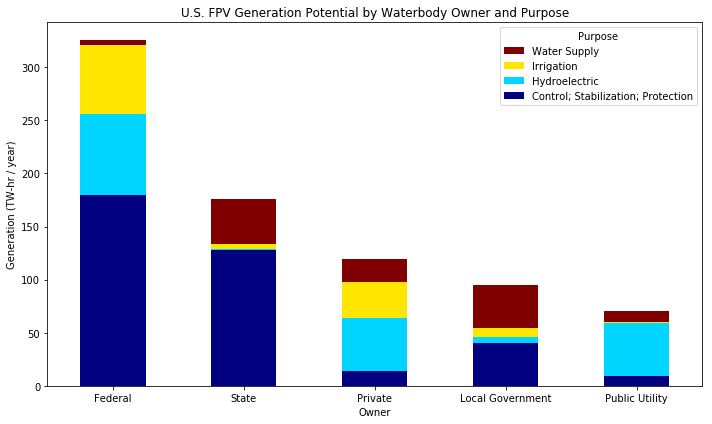

In [9]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
gb.reindex(index=index_order).plot(kind='bar', stacked=True, cmap = "jet", ax=ax)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Purpose', loc='upper right')
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0)

plt.ylabel('Generation (TW-hr / year)')
plt.title('U.S. FPV Generation Potential by Waterbody Owner and Purpose')
plt.tight_layout()
plt.savefig("Owner_Purpose_v2.png")
plt.show()